### 웹 크롤링
- 웹크롤러(Web Crawler)는 웹문서, 이미지 등을 주기적으로 수집하여 자동으로 데이터베이스화하는 프로그램
- 크롤러가 하는 작업을 웹 크롤링(Web Crawling)이라 함
- requests와 beautifulsoup4 패키지 사용

#### 1. 웹 문서 전체 가져오기
- urllib.request 패키지 urlopen

In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
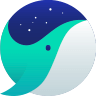
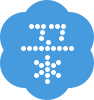

In [3]:
html = urlopen("http://naver.com/") # 소스 그대로 가져와
soup = bs(html, "html.parser")# 파싱 시킴
print(soup)

- requests 패키지 requests.get


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
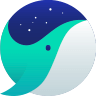
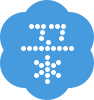

In [5]:
import requests
html = requests.get("http://naver.com/") #.text나 .content해야함
soup = bs(html.text, "html.parser")
print(soup)

##### 2. html 태그에서 원하는 정보 추출하기
- html 태그를 이용하는 방법
- CSS Selector를 이용하는 방법

- html 태그: 
    * find("태그"): 첫번째 태그만 검색 /
    * find_all("태그") : 태그 전체를 검색(list로 반환)

In [12]:
# F12로 확인한 class를 이용해 태그 검색
find_div = soup.find("div", class_="group_nav")
find_div

# id를 이용해 태그 검색
find_div = soup.find("div",id="NM_FAVORITE")
find_div

<div class="gnb_inner" id="NM_FAVORITE">
<div class="group_nav">
<ul class="list_nav type_fix">
<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>
<li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>
<li class="nav_item"><a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a></li>
<li class="nav_item"><a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a></li>
<li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>
<li class="nav_item">
<a class="nav" data-clk="svc.tvcast" 

In [17]:
# find_all 사용
find_div = soup.find("div", class_="group_nav")
find_lst = find_div.find_all("li")
for item in find_lst:
    print(item.get_text())        # 모든 태크를 제거하고 텍스트만 남김
    print(item.text)              # 태그 내에 있는 텍스트를 추출
    print(item.find("a")["href"]) # 태그의 속성을 출력


메일

https://mail.naver.com/
카페
https://section.cafe.naver.com/
블로그
https://section.blog.naver.com/
지식iN
https://kin.naver.com/
쇼핑
https://shopping.naver.com/
쇼핑LIVE
https://shoppinglive.naver.com/home
Pay
https://order.pay.naver.com/home

TV

https://tv.naver.com/
사전
https://dict.naver.com/
뉴스
https://news.naver.com/
증권
https://finance.naver.com/
부동산
https://land.naver.com/
지도
https://map.naver.com/
VIBE
https://vibe.naver.com/
책
https://book.naver.com/
웹툰
https://comic.naver.com/


##### CSS Selector

In [21]:
css_soup = soup.select("#NM_FAVORITE > div.group_nav > ul.list_nav.type_fix") # 리스트 형식으로 출력
css_a = css_soup[0].find_all("a")
for a in css_a:
    print(a.text)


메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV


#### [크롤링 연습]
- 네이버 지식인에서 "선릉역"으로 검색 후 첫번째 데이터 가져오기

In [31]:
import requests
from bs4 import BeautifulSoup as bs

# 크롤링 대상 url
url = "https://kin.naver.com/search/list.naver?query=%EC%84%A0%EB%A6%89%EC%97%AD&page=1"

html = requests.get(url)  # url에서 데이터 요청
soup = bs(html.text, "html.parser")  # 요청 데이터를 파싱 진행

# css를 이용한 태그 검색
ul_soup = soup.select("#s_content > div.section > ul")
# 검색된 태그에서 다시 li 전체를 검색
li_soup = ul_soup[0].find_all("li")

# 검색된 li 태그에서 원하는 텍스트 크롤링(추출)
print(li_soup[0].find("dt").get_text()) # 제목
print(li_soup[0].find("dd").get_text()) # 날짜
print(li_soup[0].select("dl > dd:nth-child(3)")[0].get_text()) # 요약내용


성수동에서 지하철 타서 선릉역까지 가

2022.02.05.
성수동에서 지하철 타서 선릉역까지 가는 거로 1회용 지하철 카드? 그거 했는데... ▶ 거리비례제 요금을 말씀하신다면 - 성수역에서 선릉역은 약 11.2Km입니다.... 


#### [미션] 1페이지 검색 결과에서 전체 내용가져오기
- 제목, 등록일, 요약 부분을 각각 가져와 DataFrame으로 저장

In [40]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# 크롤링 대상 url
url = "https://kin.naver.com/search/list.naver?query=%EC%84%A0%EB%A6%89%EC%97%AD&page=1"

html = requests.get(url)  # url에서 데이터 요청
soup = bs(html.text, "html.parser")  # 요청 데이터를 파싱 진행

# css를 이용한 태그 검색
ul_soup = soup.select("#s_content > div.section > ul")

# 검색된 태그에서 다시 li 전체를 검색
li_soup = ul_soup[0].find_all("li")

nav_kin = []
for li in li_soup:
    title = li.find("dt").get_text().replace("\n","")
    date = li.find_all("dd")[0].get_text()
    doct = li.find_all("dd")[1].get_text()
    # doct = li.select("dl > dd:nth-child(3)")[0].get_text()
    nav_kin.append({"제목":title,"등록일":date,"요약": doct})
#print(nav_kin)
df = pd.DataFrame(nav_kin)
df

,제목,등록일,요약
0,성수동에서 지하철 타서 선릉역까지 가,2022.02.05.,성수동에서 지하철 타서 선릉역까지 가는 거로 1회용 지하철 카드? 그거 했는데......
1,동서울터미널에서 선릉역 까지 노선 좀,2022.01.02.,"동서울터미널에서 선릉역 까지 노선 좀 알려주세요? ""강변 - 잠실나루 - 잠실 -..."
2,증미역에서 선릉역까지 가는 가장 빠른...,2021.09.12.,9호선일반 증미역에서 선릉역9호선급행까지 가는 방법이... 추천해주세요 출퇴근시간이...
3,선릉역누네안과 망막전문의 소개부탁드립,2022.02.15.,"선릉역누네안과 망막전문의 소개부탁드립니다,망막이 찢어졌다구 하는데, 전문의 추천부탁..."
4,선릉역에서 쉽게 택시탈수 있는곳,2021.03.31.,선릉역에서 감남세브란스가려고 하는데 몇번 출구로 나가야 택시가 많을까요??... 개...
5,선릉역에 있는 안과 예약했는데,2021.10.08.,저희 엄마 노안 때문에.. 치료 예약을 해놨습니다. 인터넷에서 보기로는 노안도 치료...
6,신림사거리 출발 선릉역 도착,2021.04.20.,심야버스 N61번 버스 신림역에서 선릉역까지 시간이 얼마나걸리나요? 29정거장 정...
7,선릉역이랑 제일 가까운 공원 없나요?,2022.01.08.,선릉역이랑 제일 가까운 공원 없나요? 가깝고 큰공원으로는 도산공원있습니다. 아래는...
8,선릉역에서 논현2동으로 싱글침대 옮기,2021.10.19.,선릉역에서 논현2동으로 싱글침대 옮기는 용달비용 궁금해요 용달 기사도움 8만원 입...
9,선릉역의 발음과 어떤 음운 변동이...,2021.04.11.,선릉역 발음이 설릉녁이라고 된다고 알고 있는데 맞나요 ?? 어떤 음운 변동 때문에....


#### 3. 검색어를 이용한 크롤링
- urllib패키지의 parse 모듈

In [43]:
# parse 모듈 사용법
from urllib import parse

text = "선릉역"

enc = parse.quote(text) # 컴퓨터 언어로 인코딩
print(enc)

# 컴퓨터 언어를 사람이 알아볼 수 있는 상태로 디코딩
dec = parse.unquote('%EC%84%A0%EB%A6%89%EC%97%AD')
print(dec)

%EC%84%A0%EB%A6%89%EC%97%AD
선릉역


In [47]:
from urllib import parse
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# 검색어 입력 받기
text = input("검색어 입력: ")


# 크롤링 대상 url
url = "https://kin.naver.com/search/list.naver?query="+parse.quote(text)+"&page=1"

html = requests.get(url)  # url에서 데이터 요청
soup = bs(html.text, "html.parser")  # 요청 데이터를 파싱 진행

# css를 이용한 태그 검색
ul_soup = soup.select("#s_content > div.section > ul")

# 검색된 태그에서 다시 li 전체를 검색
li_soup = ul_soup[0].find_all("li")

nav_kin = []
for li in li_soup:
    title = li.find("dt").get_text().replace("\n","")
    date = li.find_all("dd")[0].get_text()
    doct = li.find_all("dd")[1].get_text()
    # doct = li.select("dl > dd:nth-child(3)")[0].get_text()
    nav_kin.append({"제목":title,"등록일":date,"요약": doct})
#print(nav_kin)
df = pd.DataFrame(nav_kin)
df

검색어 입력: 강남


,제목,등록일,요약
0,강남비뇨기과 중에서,2022.02.22.,강남비뇨기과 중에서 확대 쪽 괜찮은 곳 있나요? 사무실이 강남이라 강남비뇨기과 찾습...
1,강남비뇨기과 알아보는 팁 없나요?,2022.01.10.,... 강남비뇨기과 찾아보는 중인데 후기 같은거 보면 무조건 잘하는데로 찾는 게 중...
2,강남 흡연카페,2022.02.27.,강남이랑 강남 근처에 흡연부스 있는 카페 있나요? 강남역주변에 커피빈이 많음 대부분...
3,강남실리프팅 받을 때 알아야할거!,2022.02.11.,... 큰맘먹고 강남실리프팅을 좀 받아볼까 하거든요? 아직 30도 안됬는데..ㅠㅠㅠ...
4,운전면허 강남 필기시험,2022.03.21.,"강남시험장 필기 예약했는데 그 시험 보기전에 교육 이수해야... 5)2장, 신분증,..."
5,강남치아교정 진료 잘봐주는곳은?,2021.11.30.,직장이 강남이라서 근처로 치아교정 알아보고 있습니다 강남치아교정 검색해보니 정말.....
6,강남센트럴시티 호남선 질문,2022.02.14.,제가 강남역으로 가서 지하상가 들렸다 올라가서 호남선 가는 버스를 탄 적이 있는데요...
7,강남 쌍수,2021.11.24.,... 하려고 강남가서 하려는데 강남 병원 추천해주세요... 경력 많으신 분으루.....
8,강남역 가는법,2022.03.09.,안녕하세요 제가 오늘 친구들이랑 강남역에 가기로 했는데 강남역 가려면 버스 어떤 노...
9,강남3구,2022.03.15.,"... 강남, 서초, 송파 순서대로 강남3구라 불린 다는 것을 오늘 처음 알았네요...."


#### 4. 검색된 내용 전체(페이지 이동)

In [56]:
from urllib import parse
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# 검색어 입력 받기
text = input("검색어 입력: ")
n_page = input("페이지 수:")
nav_kin = []

for i in range(1,int(n_page)+1):
    # 크롤링 대상 url
    url = "https://kin.naver.com/search/list.naver?query="+parse.quote(text)
    url = url+"&page="+str(i)

    html = requests.get(url)  # url에서 데이터 요청
    soup = bs(html.text, "html.parser")  # 요청 데이터를 파싱 진행

    # css를 이용한 태그 검색
    ul_soup = soup.select("#s_content > div.section > ul")

    # 검색된 태그에서 다시 li 전체를 검색
    li_soup = ul_soup[0].find_all("li")
    for li in li_soup:
        title = li.find("dt").get_text().replace("\n","")
        date = li.find_all("dd")[0].get_text()
        doct = li.find_all("dd")[1].get_text()
        # doct = li.select("dl > dd:nth-child(3)")[0].get_text()
        nav_kin.append({"제목":title,"등록일":date,"요약": doct})
#print(nav_kin)
df = pd.DataFrame(nav_kin)
df

검색어 입력: 빅데이터
페이지 수:5


,제목,등록일,요약
0,빅데이터 전문가,2022.02.25.,... 최근 빅데이터에 관심이 많이 생겨 고민중입니다. 알아보니 빅데이터 전문가라는...
1,IoT와 빅데이터,2022.02.10.,IoT와 빅데이터는 어떤 연관성이 있는지 자세히 알려주세요!!... 이 빅데이터 기...
2,빅데이터 it관련 학점제은행 같이...,2022.02.07.,빅데이터 학교를 알아보는데 늦었지만 전문대 인터넷으루 졸업증이라도 딸려고하는데......
3,빅데이터 전문가,2022.02.21.,"빅데이터 전문가가 될려면 학벌이 중요하나요?? 공부... 네 안녕하세요 질문자님, ..."
4,빅데이터를 다루는 sw개발자가...,2021.11.22.,... 제공하는 빅데이터 플랫폼 개발자가 되고싶습니다.... 빅데이터 플랫폼 개발자...
5,부산빅데이터학원 질문드립니다.,2022.03.17.,부산에서 빅데이터 공부 할 수 있는 학원은 없나요? 제가... 대학교 3학년부터는 ...
6,빅데이터분석기사 아시나요?,2022.02.17.,빅데이터분석기사 해보려고 합니다. 이쪽으로 흥미를 느껴서 진지하게 빅데이터분석기사을...
7,빅데이터 비전공자가 하기엔 어려울까요?,2022.03.08.,안녕하세요 최근에 빅데이터에 대해 관심이생겨 문의드립니다 제가 국비지원에서 빅데이터...
8,어떻게 빅데이터를 공부해야할지...,2022.03.23.,빅 데이터에 관심이 있는 고2 입니다 컴퓨터에 관심이 많아 빅 데이터 라는 꿈을 꾸...
9,빅데이터가 무엇인지 궁금합니다,2022.02.21.,빅데이터가 무엇인지 궁금합니다 빅데이터의 정의와 활용 사례 관련 참고해볼만한 글 남...
